In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [3]:
df = pd.read_csv("Final_data.csv")
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,46.77,Female,98.31,1.90,199.20,148.18,63.72,0.77,761.61,Strength,...,1882.80,0.500000,0.954837,0.623413,0.743876,1865.39,71.269345,533.2558,7.924402e+19,Medium
19996,40.38,Female,88.12,1.87,196.18,134.18,54.04,1.97,2303.13,Strength,...,1205.47,0.496968,0.689060,0.563810,0.683964,173.87,65.049689,1310.6016,5.708474e+19,Low
19997,50.31,Male,46.20,1.67,163.34,157.92,61.65,1.36,1468.80,Strength,...,1947.79,0.500280,2.105844,0.946701,0.966818,-43.80,35.420708,957.9568,9.101285e+19,High
19998,52.36,Male,44.30,1.62,179.27,121.23,60.88,1.41,929.75,Yoga,...,1921.51,0.499940,2.190745,0.509756,0.676243,346.25,35.889260,928.4004,5.246436e+19,Low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Weight (kg)'}>,
        <Axes: title={'center': 'Height (m)'}>,
        <Axes: title={'center': 'Max_BPM'}>,
        <Axes: title={'center': 'Avg_BPM'}>,
        <Axes: title={'center': 'Resting_BPM'}>],
       [<Axes: title={'center': 'Session_Duration (hours)'}>,
        <Axes: title={'center': 'Calories_Burned'}>,
        <Axes: title={'center': 'Fat_Percentage'}>,
        <Axes: title={'center': 'Water_Intake (liters)'}>,
        <Axes: title={'center': 'Workout_Frequency (days/week)'}>,
        <Axes: title={'center': 'Experience_Level'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Daily meals frequency'}>,
        <Axes: title={'center': 'Physical exercise'}>,
        <Axes: title={'center': 'Carbs'}>,
        <Axes: title={'center': 'Proteins'}>,
        <Axes: title={'center': 'Fats'}>],
       [<Axes: title={'center': 'Calories'}>,
        <Axes: title={'center': 'sugar_g'

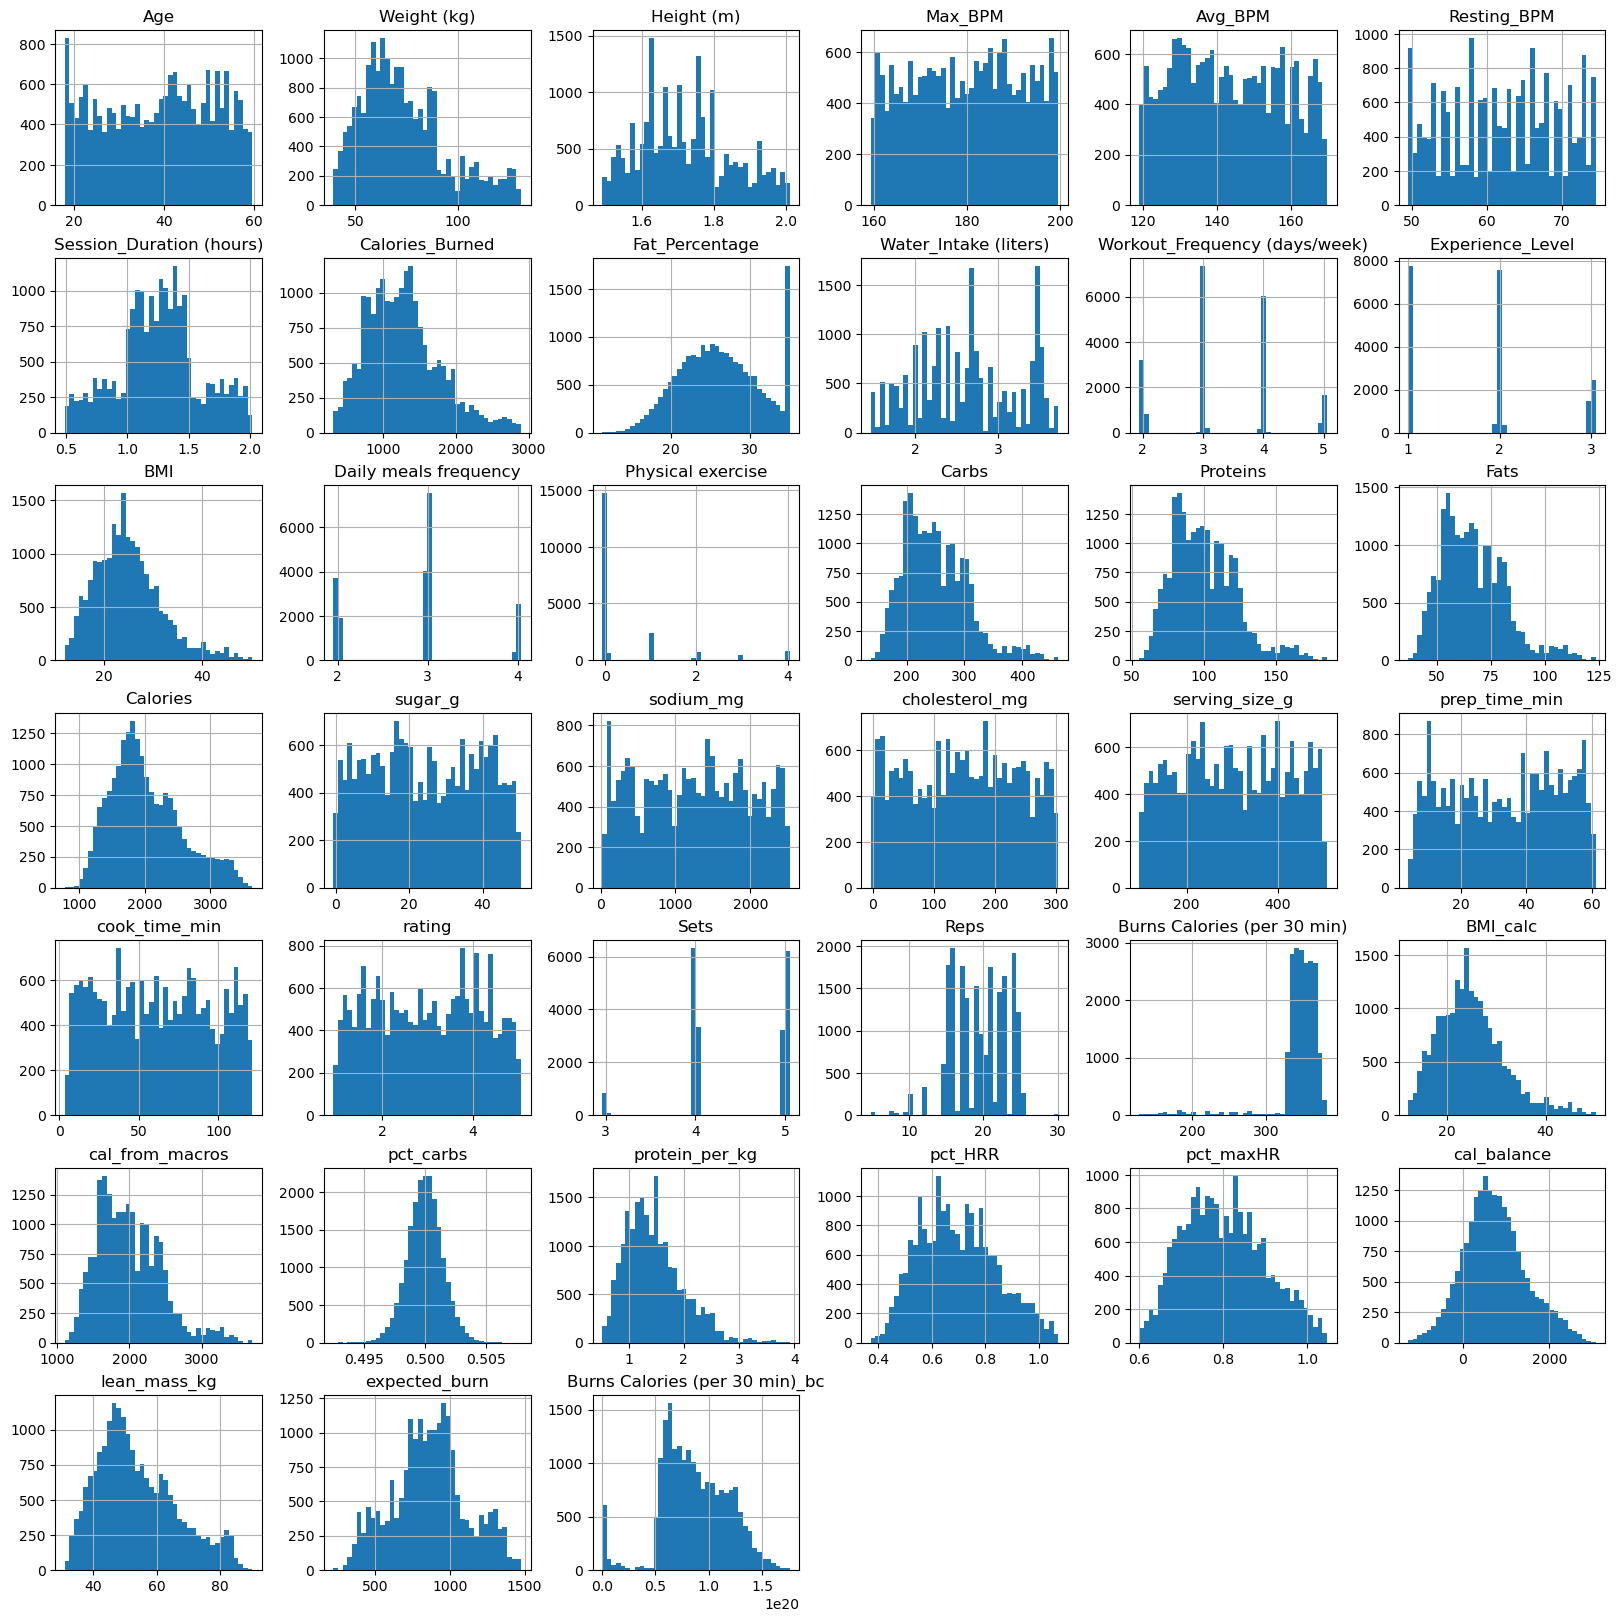

In [5]:
df.hist(bins=40,figsize=(20,20))

In [ ]:
x = df[['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'BMI',
          'Workout_Type', 'Workout_Frequency (days/week)',
          'Session_Duration (hours)', 'Calories_Burned',
          'Calories', 'Carbs', 'Proteins', 'Fats', 'Water_Intake (liters)',
          'Experience_Level']]
y = df['Fat_Percentage']



0        26.800377
1        27.655021
2        24.320821
3        32.813572
4        17.307319
           ...    
19995    27.505498
19996    26.180562
19997    23.331802
19998    18.985868
19999    24.435892
Name: Fat_Percentage, Length: 20000, dtype: float64

In [28]:
# --- تقسیم داده‌ها ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# تشخیص ستون‌ها 
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("ستون‌های عددی:", numeric_features)
print("ستون‌های دسته‌ای:", categorical_features)

ستون‌های عددی: ['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Workout_Frequency (days/week)', 'Session_Duration (hours)', 'Calories_Burned', 'Calories', 'Carbs', 'Proteins', 'Fats', 'Water_Intake (liters)', 'Experience_Level']
ستون‌های دسته‌ای: ['Gender', 'Workout_Type']


In [ ]:
# --- پیش‌پردازش ستون‌های عددی ---
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),      # جایگزینی مقادیر گمشده با میانه
    ('scaler', StandardScaler())                        # نرمال‌سازی داده‌ها
])

# --- پیش‌پردازش ستون‌های متنی ---
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # پرکردن مقادیر گمشده با پرتکرارترین مقدار
    ('onehot', OneHotEncoder(handle_unknown='ignore'))    # تبدیل به بردار عددی
])

In [20]:
#  پیش‌پردازش ستون‌های عددی 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),      # جایگزینی مقادیر گمشده با میانه
    ('scaler', StandardScaler())                        # نرمال‌سازی داده‌ها
])

# --- پیش‌پردازش ستون‌های متنی ---
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # پرکردن مقادیر گمشده با پرتکرارترین مقدار
    ('onehot', OneHotEncoder(handle_unknown='ignore'))    # تبدیل به بردار عددی
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [21]:
# --- اعمال پیش‌پردازش روی داده ---
X_processed = preprocessor.fit_transform(X)
# --- نمایش اطلاعات ---
print(f"\nشکل داده خام: {X.shape}")
print(f"شکل داده پس از پیش‌پردازش: {X_processed.shape}")



شکل داده خام: (20000, 15)
شکل داده پس از پیش‌پردازش: (20000, 19)


In [25]:
# --- ساخت Pipeline نهایی با مدل ---
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)

In [29]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])
# --- آموزش Pipeline ---
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [31]:
# --- پیش‌بینی ---
y_pred = pipeline.predict(X_test)
# --- ارزیابی ---
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("✅ مدل با موفقیت آموزش دید!")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.3f}")

✅ مدل با موفقیت آموزش دید!
Mean Absolute Error (MAE): 1.48
R² Score: 0.854


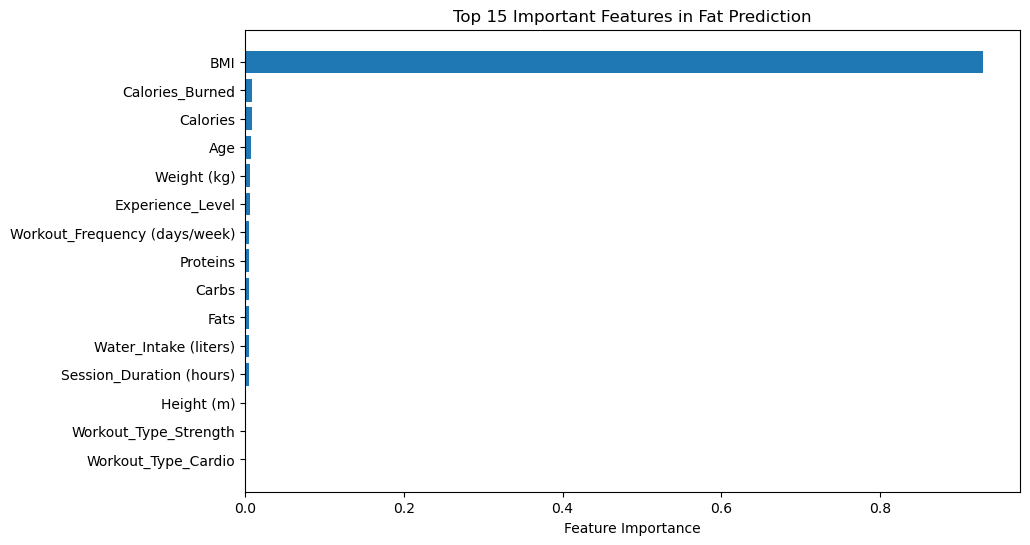

In [37]:
import matplotlib.pyplot as plt

# استخراج ویژگی‌های نهایی از پیش‌پردازش
model_rf = pipeline.named_steps['model']
preproc = pipeline.named_steps['preprocessor']

# استخراج نام ستون‌ها پس از OneHotEncoder
encoded_columns = list(preproc.named_transformers_['num'].get_feature_names_out(numeric_features))
encoded_columns += list(preproc.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))

# نمودار اهمیت ویژگی‌ها
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1][:15]

plt.figure(figsize=(10,6))
plt.barh(np.array(encoded_columns)[indices][::-1], importances[indices][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 15 Important Features in Fat Prediction")
plt.show()


In [38]:
import joblib
joblib.dump(pipeline, "fat_percentage_predictor.joblib")
print("💾 مدل ذخیره شد و آماده استفاده در اپلیکیشن است.")

💾 مدل ذخیره شد و آماده استفاده در اپلیکیشن است.
